In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os

# Define the Generator
class Generator(nn.Module):
    def __init__(self, latent_dim, image_size):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, image_size),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img

# Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self, image_size):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(image_size, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        validity = self.model(img)
        return validity

# Initialize parameters
latent_dim = 100
image_size = 28 * 28  # For MNIST dataset (28x28 images)
batch_size = 64
epochs = 50
learning_rate = 0.0002

# Prepare MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
dataloader = DataLoader(mnist_dataset, batch_size=batch_size, shuffle=True)

# Create instances of Generator and Discriminator
generator = Generator(latent_dim, image_size)
discriminator = Discriminator(image_size)

# Set up loss function and optimizers
adversarial_loss = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate)

# Directory to save generated images
os.makedirs("generated_images", exist_ok=True)

# Training loop
for epoch in range(epochs):
    for i, (imgs, _) in enumerate(dataloader):
        # Prepare real and fake labels
        valid = torch.ones((imgs.size(0), 1))
        fake = torch.zeros((imgs.size(0), 1))

        # Real images
        real_imgs = imgs.view(imgs.size(0), -1)

        # Train Generator
        optimizer_G.zero_grad()
        z = torch.randn((imgs.size(0), latent_dim))
        generated_imgs = generator(z)
        g_loss = adversarial_loss(discriminator(generated_imgs), valid)
        g_loss.backward()
        optimizer_G.step()

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = adversarial_loss(discriminator(real_imgs), valid)
        fake_loss = adversarial_loss(discriminator(generated_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

        # Print progress
        if i % 100 == 0:
            print(
                f"[Epoch {epoch+1}/{epochs}] [Batch {i}/{len(dataloader)}] "
                f"[D loss: {d_loss.item():.6f}] [G loss: {g_loss.item():.6f}]"
            )

    # Save generated images for visualization
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            z = torch.randn(64, latent_dim)
            gen_imgs = generator(z).view(-1, 1, 28, 28)
            gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale to [0, 1]
            grid = torch.cat([gen_imgs[i] for i in range(64)], dim=1)
            plt.imshow(grid.numpy().transpose(1, 2, 0).squeeze(), cmap="gray")
            plt.title(f"Generated Images at Epoch {epoch+1}")
            plt.axis("off")
            plt.savefig(f"generated_images/epoch_{epoch+1}.png")
            plt.close()


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [03:10<00:00, 52.0kB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 127kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:36<00:00, 45.5kB/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

[Epoch 1/50] [Batch 0/938] [D loss: 0.735045] [G loss: 0.726238]
[Epoch 1/50] [Batch 100/938] [D loss: 0.157915] [G loss: 1.576017]
[Epoch 1/50] [Batch 200/938] [D loss: 0.007597] [G loss: 4.500722]
[Epoch 1/50] [Batch 300/938] [D loss: 0.646479] [G loss: 0.924181]
[Epoch 1/50] [Batch 400/938] [D loss: 0.044627] [G loss: 3.338216]
[Epoch 1/50] [Batch 500/938] [D loss: 0.064505] [G loss: 8.394277]
[Epoch 1/50] [Batch 600/938] [D loss: 0.034420] [G loss: 5.944958]
[Epoch 1/50] [Batch 700/938] [D loss: 0.232546] [G loss: 4.271797]
[Epoch 1/50] [Batch 800/938] [D loss: 0.038641] [G loss: 2.943930]
[Epoch 1/50] [Batch 900/938] [D loss: 0.026800] [G loss: 3.975080]
[Epoch 2/50] [Batch 0/938] [D loss: 0.020367] [G loss: 7.298092]
[Epoch 2/50] [Batch 100/938] [D loss: 0.118126] [G loss: 3.963295]
[Epoch 2/50] [Batch 200/938] [D loss: 0.621565] [G loss: 2.386770]
[Epoch 2/50] [Batch 300/938] [D loss: 0.326789] [G loss: 2

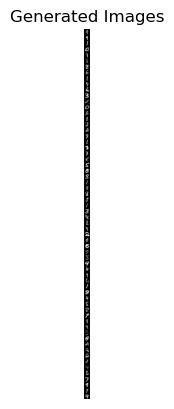

In [3]:
import matplotlib.pyplot as plt

# Generate random noise
z = torch.randn(64, latent_dim)

# Generate images
with torch.no_grad():
    generated_imgs = generator(z).view(-1, 1, 28, 28)

# Rescale images to [0, 1]
generated_imgs = 0.5 * generated_imgs + 0.5

# Plot the images
grid = torch.cat([generated_imgs[i] for i in range(64)], dim=1)
plt.imshow(grid.numpy().transpose(1, 2, 0).squeeze(), cmap="gray")
plt.title("Generated Images")
plt.axis("off")
plt.show()


In [5]:
torch.save(generator.state_dict(), "generator.pth")


In [7]:
generator.load_state_dict(torch.load("generator.pth"))
generator.eval()


C:\Users\venkateshgoud\AppData\Local\Temp\ipykernel_13800\2027841494.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator.load_state_dict(torch.load("generator.pth"

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=784, bias=True)
    (5): Tanh()
  )
)

In [9]:
state_dict = torch.load("generator.pth", weights_only=True)  # Explicitly state weights_only=True
generator.load_state_dict(state_dict)
generator.eval()


Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=784, bias=True)
    (5): Tanh()
  )
)